In [5]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

ImportError: cannot import name 'to_categorical' from 'keras.utils' (C:\Users\Nikhil\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\__init__.py)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

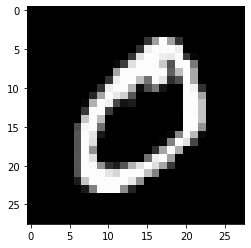

0


In [3]:
plt.imshow(X_train[1], cmap="gray")
plt.show()
print (y_train[1])

In [4]:
##1). Data Preprocessing — Reshaping Stuff

In [5]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [6]:
# reshaping
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [8]:
## 2). One-hot Encoding

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
## 3). Let’s build the model

In [11]:
from keras import Sequential
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [12]:
## 4). Compiling the model

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
## 5). Training the model

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 76s 1ms/step - loss: 0.4464 - accuracy: 0.9521 - val_loss: 0.1107 - val_accuracy: 0.9680
Epoch 2/3
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0723 - accuracy: 0.9785 - val_loss: 0.0974 - val_accuracy: 0.9707
Epoch 3/3
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.1019 - val_accuracy: 0.9728


In [16]:
##6). Predicting and testing on the current dataset

Prediction (Softmax) from the neural network:

 [[9.9999821e-01 6.4369015e-15 1.6717702e-07 2.9656423e-11 3.9396303e-10
  3.6009312e-12 2.1979234e-09 8.4310683e-12 5.9928482e-07 1.0645969e-06]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




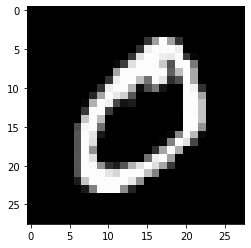



Final Output: 0


In [17]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [ ]:
##  Testing on real image

In [4]:
image = cv2.imread('./pic1.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

AttributeError: 'NoneType' object has no attribute 'copy'

In [40]:
## now predicting




---------------------------------------


=========PREDICTION============ 




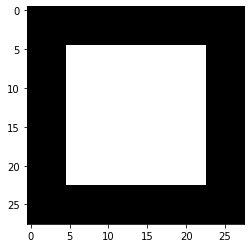



Final Output: 0

Prediction (Softmax) from the neural network:

 [[9.9997687e-01 4.7617281e-13 4.6743516e-09 1.7808854e-10 2.0200486e-10
  7.9235875e-13 2.6286614e-14 5.1058197e-10 2.3113385e-05 1.5526443e-09]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




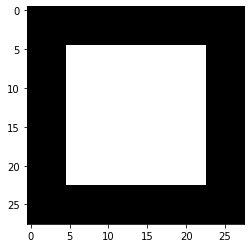



Final Output: 0

Prediction (Softmax) from the neural network:

 [[9.9997687e-01 4.7617281e-13 4.6743516e-09 1.7808854e-10 2.0200486e-10
  7.9235875e-13 2.6286614e-14 5.1058197e-10 2.3113385e-05 1.5526443e-09]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




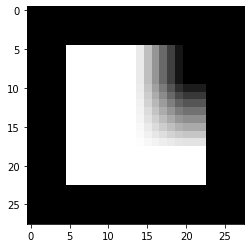



Final Output: 0

Prediction (Softmax) from the neural network:

 [[9.9833679e-01 1.2299967e-10 4.8258712e-06 1.4747395e-08 1.9276081e-06
  1.2230756e-08 3.6192252e-10 2.7307519e-06 1.6515554e-03 2.1135450e-06]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




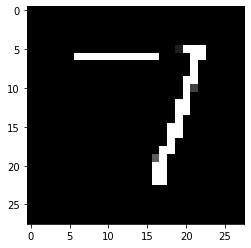



Final Output: 7

Prediction (Softmax) from the neural network:

 [[7.3546539e-07 2.2881586e-08 7.4165342e-08 2.4082174e-09 1.6043033e-02
  2.7084373e-09 1.1975665e-13 9.8395616e-01 6.4139560e-09 5.1914657e-13]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




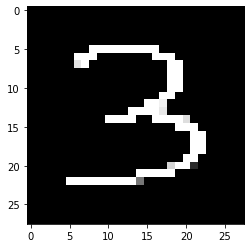



Final Output: 3

Prediction (Softmax) from the neural network:

 [[1.62659228e-17 4.29396449e-15 1.86025118e-09 1.00000000e+00
  1.56853998e-16 3.24441266e-13 1.68706200e-20 1.25756775e-11
  2.38421804e-12 1.00863744e-11]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




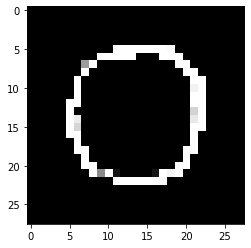



Final Output: 9

Prediction (Softmax) from the neural network:

 [[2.2653078e-01 4.2041202e-16 3.4119214e-06 5.9788808e-06 9.2452310e-11
  2.2593214e-09 1.1691484e-03 8.5588865e-04 5.2910758e-04 7.7090579e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




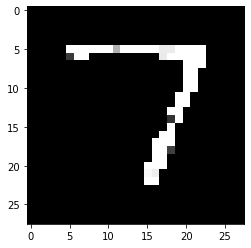



Final Output: 7

Prediction (Softmax) from the neural network:

 [[3.4550519e-07 1.2557821e-10 1.8543857e-07 2.1525102e-09 6.3644706e-10
  4.0547250e-11 1.4236281e-14 9.9999380e-01 5.5262485e-06 2.4337905e-07]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




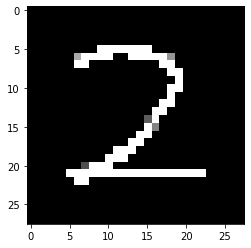



Final Output: 2

Prediction (Softmax) from the neural network:

 [[3.9502806e-23 2.3193888e-17 1.0000000e+00 5.8616598e-11 6.3992274e-17
  7.9586383e-28 1.8188121e-28 2.4221892e-12 4.4991912e-17 1.4990074e-17]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




In [41]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")